In [1]:
import pandas as pd

In [5]:
df = pd.read_csv('insurance.csv')

In [6]:
df.shape

(1338, 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
df.value_counts('sex')

,count
sex,
male,676
female,662


In [12]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [24]:
is_duplicate = df.duplicated()
is_duplicate.value_counts()

,count
False,1337
True,1


In [15]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max

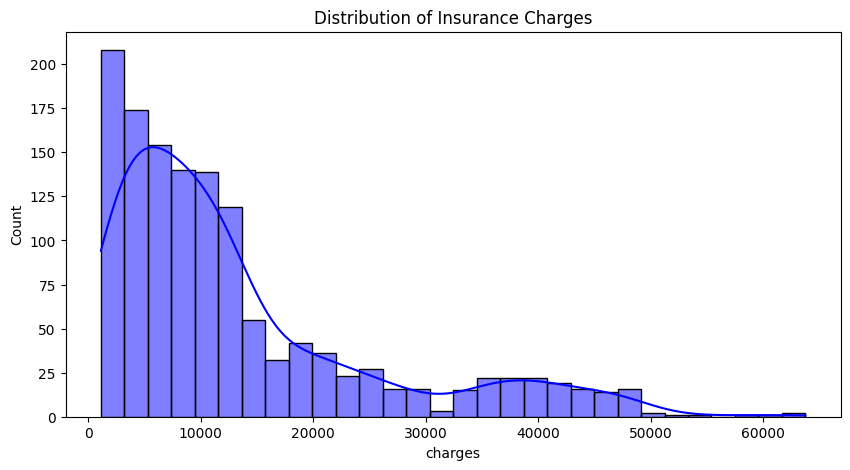

In [16]:
plt.figure(figsize=(10, 5))
sns.histplot(df['charges'], kde=True, color='blue')
plt.title('Distribution of Insurance Charges')
plt.show()

/tmp/ipython-input-775802506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0], palette='Set2')
/tmp/ipython-input-775802506.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sex', y='charges', data=df, ax=axes[1], palette='Set1')
/tmp/ipython-input-775802506.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='charges', data=df, ax=axes[2], palette='Pastel1')


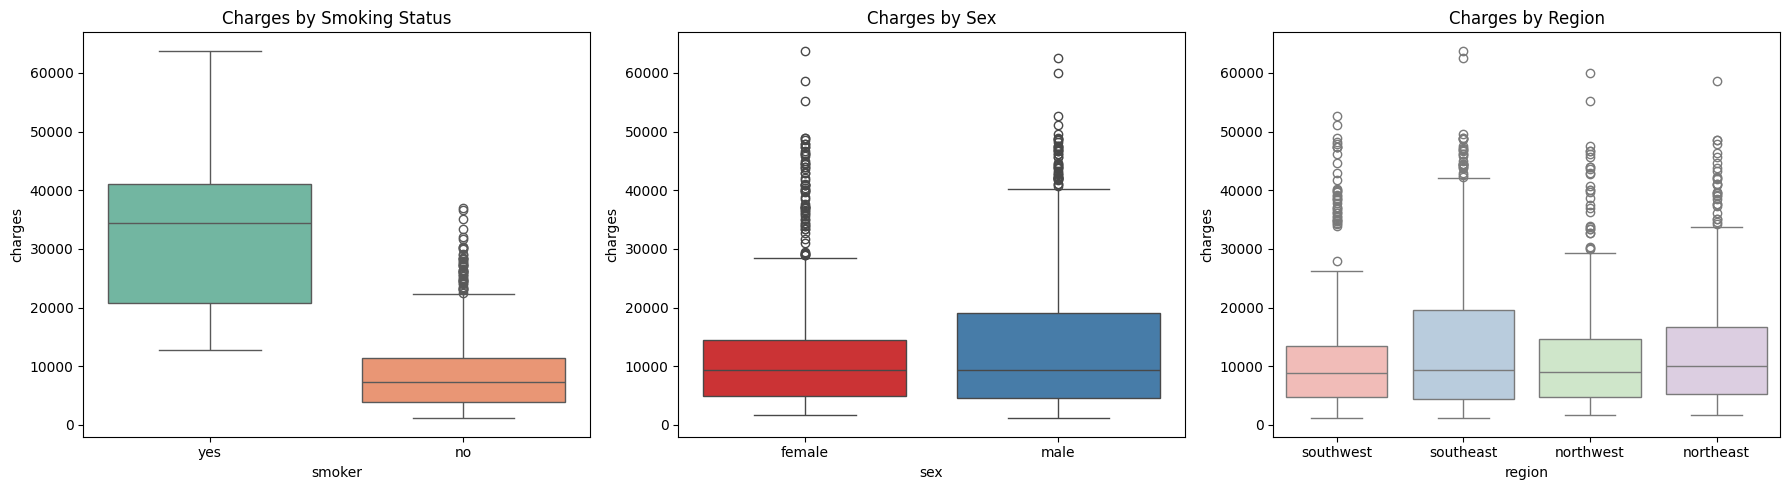

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Smoker vs Charges
sns.boxplot(x='smoker', y='charges', data=df, ax=axes[0], palette='Set2')
axes[0].set_title('Charges by Smoking Status')

# Sex vs Charges
sns.boxplot(x='sex', y='charges', data=df, ax=axes[1], palette='Set1')
axes[1].set_title('Charges by Sex')

# Region vs Charges
sns.boxplot(x='region', y='charges', data=df, ax=axes[2], palette='Pastel1')
axes[2].set_title('Charges by Region')

plt.tight_layout()
plt.show()

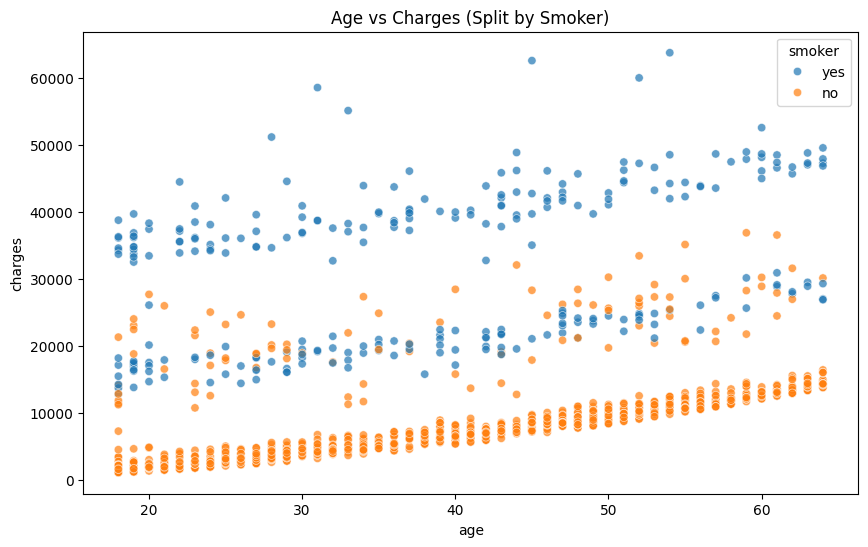

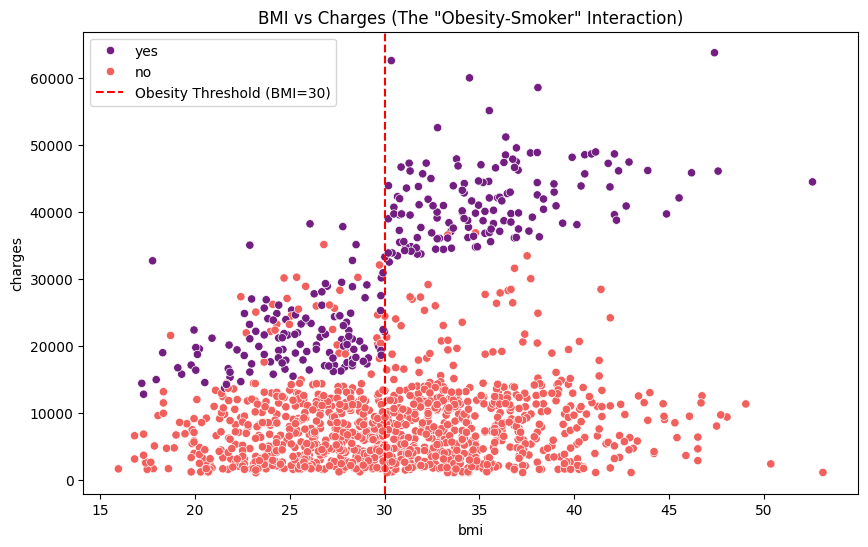

In [18]:
# Age vs Charges colored by Smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='charges', hue='smoker', data=df, alpha=0.7)
plt.title('Age vs Charges (Split by Smoker)')
plt.show()

# BMI vs Charges colored by Smoker status
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df, palette='magma')
plt.axvline(30, color='red', linestyle='--', label='Obesity Threshold (BMI=30)')
plt.title('BMI vs Charges (The "Obesity-Smoker" Interaction)')
plt.legend()
plt.show()

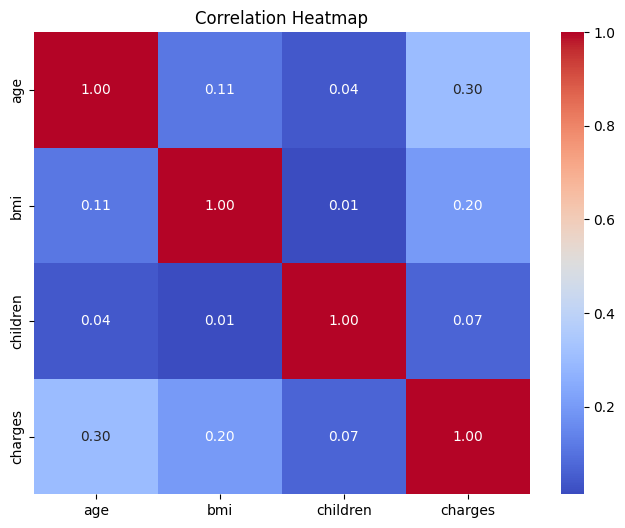

In [20]:
# Encoding for correlation heatmap
df_encoded = df.copy()
df_encoded.drop('sex', axis=1, inplace=True)
df_encoded.drop('smoker', axis=1, inplace=True)
# Dropping region for a simpler correlation matrix
corr = df_encoded.drop('region', axis=1).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()